# Linear Regression in PyTorch.

In [ ]:
# Import Dependencies

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Preparing Our Data -

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))  # Numpy array generated is in double. We convert that to avoid some errors later in PyTorch.
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # Making y a column vector.

n_samples, n_features = X.shape

### Creating Our Model 

In [ ]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

### Loss and Optimizer

In [ ]:
learning_rate = 0.01

criterion = nn.MSELoss()  # Calculates the mean squared error. criterion is now a callable function.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training Loop

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
  # Forward Pass and Loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # Backward Pass
  loss.backward()

  # Update weights
  optimizer.step()

  # Set gradients to zero again.
  optimizer.zero_grad()

  if epoch+1%10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

### Plotting the information

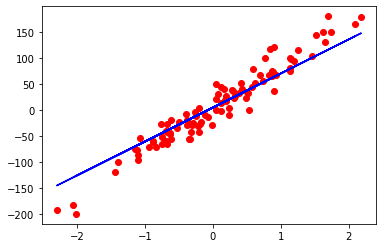

In [ ]:
predicted = model(X).detach() # We dont want this to be tracked in the computational graph.
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

 The blue line is our predictions and the red dots are the original data generated by scikit-learn.